In [1]:

import gc
gc.collect()
# import libraries



200

In [2]:
from scipy import stats
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sb


In [3]:
application_train = pd.read_csv("//home//mgwarada//Desktop//Ruvimbo//application_train.csv")
#application_train.head()



In [ ]:
#colNullCnt = []
#for z in range(len(application_train.columns)):
#    colNullCnt.append([application_train.columns[z], sum(pd.isnull(application_train[application_train.columns[z]]))])
    
#colNullCnt  

In [ ]:
#application_train.shape

In [4]:
# add debt to income ratio a key measure of capacity in credit risk management
application_train['DEBT_TO_INCOME'] = application_train['AMT_CREDIT']/ application_train['AMT_INCOME_TOTAL']
#application_train.head()

In [5]:
bureau = pd.read_csv("/home/mgwarada/Desktop/Ruvimbo/bureau.csv")


#bureau.shape

In [6]:
# bureau data has duplicated customer ids, aggregating variables would help when we mere data

bureau_grouped = bureau.drop(['SK_ID_BUREAU'],axis=1).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean','max' ,'sum']).reset_index()
#bureau_grouped.head()
bureau_grouped.name= 'bureau_grouped'

In [7]:
# to change code ASAP

def format_columns(df):
    columns = ['SK_ID_CURR']

# Iterate through the variables names
    for var in df.columns.levels[0]:
    # Skip the id name
        if var != 'SK_ID_CURR':
        
        # Iterate through the stat names
           for stat in df.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
                columns.append(str(df.name) + " " + var + " " +str(stat))
    return columns


In [8]:
columns = format_columns(bureau_grouped)
bureau_grouped.columns= columns 
#bureau_grouped.head()

In [ ]:
#df for active loans for each client
#active_loans = bureau[bureau['CREDIT_ACTIVE']=='Active']
#active_loans.head()

In [ ]:
#active_loans.shape

In [ ]:
#active_grouped = active_loans.drop(['SK_ID_BUREAU'],axis=1).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean','max', 'sum']).reset_index()
#active_grouped.head()

In [ ]:
#active_grouped.columns = columns 
#active_grouped.head()

In [9]:
bureau_balance = pd.read_csv("//home/mgwarada/Desktop/Ruvimbo/bureau_balance.csv")
#bureau_balance.head()


In [ ]:
#bureau_balance.info()

In [10]:
# bureau balance max is 0 as debts are recorded as negative number , the min taken insted to represent the maximum loan advanced to a client 
bureau_balance_grouped = bureau_balance.drop(['STATUS'], axis= 1).groupby('SK_ID_BUREAU', as_index = False).agg(['count', 'mean', 'max','min', 'sum']).reset_index()
#bureau_balance_grouped.head()
bureau_balance_grouped.name= 'bureau_balance_grouped'

In [11]:
columns = ['SK_ID_BUREAU']

# Iterate through the variables names
for var in bureau_balance_grouped.columns.levels[0]:
    # Skip the id name
    if var != 'SK_ID_BUREAU':
        
        # Iterate through the stat names
        for stat in bureau_balance_grouped.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('bureau_balance_%s_%s' % (var, stat))


In [12]:

bureau_balance_grouped.columns = columns
#bureau_balance_grouped.head()

In [13]:
customer_id_lookup= bureau [['SK_ID_BUREAU','SK_ID_CURR']]
#customer_id_lookup.head()


In [14]:
bureau_balance_grouped = pd.merge(bureau_balance_grouped, customer_id_lookup, how='left',left_on='SK_ID_BUREAU', right_on='SK_ID_BUREAU')
#bureau_balance_grouped.head()

In [15]:


bureau_balance_customer = bureau_balance_grouped.drop(['SK_ID_BUREAU'],axis=1).groupby('SK_ID_CURR', as_index = False).agg(['mean', 'max', 'sum']).reset_index()
#bureau_balance_customer.head()
bureau_balance_customer.name='bureau_balance_customer'

In [16]:
columns= format_columns(bureau_balance_customer)
bureau_balance_customer.columns= columns
#bureau_balance_customer.head()


In [17]:
POS_CASH_balance = pd.read_csv("//home/mgwarada/Desktop/Ruvimbo/POS_CASH_balance.csv")
#POS_CASH_balance.head()


In [19]:
#POS_CASH_balance.info()

In [20]:
# bureau balance max is 0 as debts are recorded as negative number , the min taken insted to represent the maximum loan advanced to a client 
POS_CASH_grouped = POS_CASH_balance.drop(['SK_ID_PREV'],axis=1).groupby('SK_ID_CURR', as_index = False).agg([ 'mean', 'max', 'sum']).reset_index()
POS_CASH_grouped.name= 'POS_CASH_grouped'

In [21]:
columns= format_columns(POS_CASH_grouped)
POS_CASH_grouped.columns= columns
#POS_CASH_grouped.head()

In [22]:
credit_card_balance = pd.read_csv("/home/mgwarada/Desktop/Ruvimbo/credit_card_balance.csv")
#credit_card_balance.head()


In [ ]:
credit_card_balance.info()

In [23]:
credit_card_balance_grouped = credit_card_balance.drop( ['SK_ID_PREV'], axis =1).groupby('SK_ID_CURR', as_index = False).agg(['mean', 'max', 'sum']).reset_index()
credit_card_balance_grouped.name= 'credit_card_balance_grouped'

In [24]:
columns = format_columns(credit_card_balance_grouped)
credit_card_balance_grouped.columns= columns 
#credit_card_balance_grouped.head()

In [25]:
previous_application = pd.read_csv("//home/mgwarada/Desktop/Ruvimbo/previous_application.csv")
#previous_application.head()


In [ ]:
previous_application.info()

In [26]:
previous_application_grouped = previous_application.drop(['SK_ID_PREV'],axis=1).groupby('SK_ID_CURR', as_index = False).agg([ 'mean', 'max', 'sum']).reset_index()
previous_application_grouped.name= 'previous_application_grouped'

In [27]:
columns = format_columns(previous_application_grouped)
previous_application_grouped.columns= columns
#previous_application_grouped.head()

In [28]:
installments_payments = pd.read_csv("/home/mgwarada/Desktop/Ruvimbo/installments_payments.csv")
#installments_payments.head()


In [ ]:
installments_payments.info()

In [29]:

installments_payments_grouped = installments_payments.drop( ['SK_ID_PREV'],axis=1 ).groupby('SK_ID_CURR', as_index = False).agg(['mean', 'max', 'sum']).reset_index()
installments_payments_grouped.name ='installments_payments_grouped'

In [30]:
columns = format_columns(installments_payments_grouped)
installments_payments_grouped.columns = columns 
#installments_payments_grouped.head()

In [31]:
#free up memory
del credit_card_balance
del POS_CASH_balance
del previous_application
del bureau_balance
del bureau
del installments_payments 

import gc
gc.collect()

210

In [32]:
  #merging datasets DO NOT DELETE
train_data_v0 = application_train.merge(bureau_grouped, on= 'SK_ID_CURR',how='left').merge(credit_card_balance_grouped, on= 'SK_ID_CURR',how='left').merge(installments_payments_grouped,on = 'SK_ID_CURR',how='left').merge(POS_CASH_grouped, on ='SK_ID_CURR',how='left').merge(previous_application_grouped,on ='SK_ID_CURR',how='left').merge(bureau_balance_customer, on = 'SK_ID_CURR',how='left')
train_data_v0.shape

(307511, 336)

In [33]:
train_data_v1 =train_data_v0
#train_data_v1.head()

In [34]:
categorical_list = ['SK_ID_CURR']
numerical_list = []
for i in train_data_v1.columns.tolist():
    if train_data_v1[i].dtype=='object':
        categorical_list.append(i)
    else:
        numerical_list.append(i)
print('Number of categorical features:', str(len(categorical_list)))
print('Number of numerical features:', str(len(numerical_list)))
#numerical_list

Number of categorical features: 17
Number of numerical features: 320


In [35]:
numeric_train = train_data_v1 [numerical_list]
#numeric_train.head()

In [36]:
categorical_train = train_data_v1 [categorical_list]
#categorical_train.head()

In [37]:
from sklearn.preprocessing import LabelEncoder

/home/mgwarada/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [38]:
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in categorical_train:
    if categorical_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(categorical_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(categorical_train[col])
            # Transform both training and testing data
            categorical_train[col] = le.transform(categorical_train[col])
            
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

/home/mgwarada/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


3 columns were label encoded.


In [39]:
#create dummies for categorical data
categorical = pd.get_dummies(categorical_train.select_dtypes('object'))
categorical['SK_ID_CURR'] = categorical_train['SK_ID_CURR']
categorical.head()

,CODE_GENDER_F,CODE_GENDER_M,CODE_GENDER_XNA,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,SK_ID_CURR
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,100002
1,1,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,100003
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,100004
3,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,100006
4,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,100007


In [40]:
categorical_grouped = categorical.groupby('SK_ID_CURR',as_index = False).agg(['count', 'mean'])
categorical_grouped.name = 'categorical_grouped'
categorical_grouped.head()

CODE_GENDER_F      CODE_GENDER_M      CODE_GENDER_XNA       \
                   count mean         count mean           count mean   
SK_ID_CURR                                                              
100002                 1    0             1    1               1    0   
100003                 1    1             1    0               1    0   
100004                 1    0             1    1               1    0   
100006                 1    1             1    0               1    0   
100007                 1    0             1    1               1    0   

           NAME_TYPE_SUITE_Children      NAME_TYPE_SUITE_Family      ...   \
                              count mean                  count mean ...    
SK_ID_CURR                                                           ...    
100002                            1    0                      1    0 ...    
100003                            1    0                      1    1 ...    
100004                            1    0                      1    0 ...    
100006                            1    0                      1    0 ...    
100007                            1    0                      1    0 ...    

           WALLSMATERIAL_MODE_Panel      WALLSMATERIAL_MODE_Stone, brick       \
                              count mean                           count mean   
SK_ID_CURR                                                                      
100002                            1    0                               1    1   
100003                            1    0                               1    0   
100004                            1    0                               1    0   
100006                            1    0                               1    0   
100007                            1    0                               1    0   

           WALLSMATERIAL_MODE_Wooden      EMERGENCYSTATE_MODE_No       \
                               count mean                  count mean   
SK_ID_CURR                                                              
100002                             1    0                      1    1   
100003                             1    0                      1    1   
100004                             1    0                      1    0   
100006                             1    0                      1    0   
100007                             1    0                      1    0   

           EMERGENCYSTATE_MODE_Yes       
                             count mean  
SK_ID_CURR                               
100002                           1    0  
100003                           1    0  
100004                           1    0  
100006                           1    0  
100007                           1    0  

[5 rows x 268 columns]

In [41]:

# List of column names
columnsc = []

# Iterate through the variables names
for var in categorical_grouped.columns.levels[0]:
    # Skip the id name
    if var != 'SK_ID_CURR':
        
        # Iterate through the stat names
        for stat in categorical_grouped.columns.levels[1][:]:
            # Make a new column name for the variable and stat
            columnsc.append('categorical_grouped_%s_%s' % (var, stat))

In [46]:
#columns = format_columns(categorical_grouped)
categorical_grouped.columns= columnsc
#categorical_grouped.head()

In [47]:


#calculate missing values for each column
cat_percent_missing = (categorical_grouped.isnull().sum(axis = 0)/len(categorical_grouped ))*100
#round(abs(cat_percent_missing),1).sort_values(ascending=False)



In [48]:
num_percent_missing = abs((numeric_train.isnull().sum(axis = 0)/len(numeric_train))*100)
#num_percent_missing.sort_values(ascending=False)

In [49]:
num_percent_missing = num_percent_missing.index[num_percent_missing> 0.75]

In [50]:
#remove variables with more than 75% of data missing
numeric_train = numeric_train.drop(columns = num_percent_missing)

In [51]:
train_data_v1 = numeric_train.merge(categorical_grouped, left_on = 'SK_ID_CURR', right_index = True, how = 'left')
train_data_v1.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,categorical_grouped_WALLSMATERIAL_MODE_Panel_count,categorical_grouped_WALLSMATERIAL_MODE_Panel_mean,"categorical_grouped_WALLSMATERIAL_MODE_Stone, brick_count","categorical_grouped_WALLSMATERIAL_MODE_Stone, brick_mean",categorical_grouped_WALLSMATERIAL_MODE_Wooden_count,categorical_grouped_WALLSMATERIAL_MODE_Wooden_mean,categorical_grouped_EMERGENCYSTATE_MODE_No_count,categorical_grouped_EMERGENCYSTATE_MODE_No_mean,categorical_grouped_EMERGENCYSTATE_MODE_Yes_count,categorical_grouped_EMERGENCYSTATE_MODE_Yes_mean
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,1,0,1,1,1,0,1,1,1,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,1,0,1,0,1,0,1,1,1,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,1,0,1,0,1,0,1,0,1,0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,1,0,1,0,1,0,1,0,1,0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,1,0,1,0,1,0,1,0,1,0


In [52]:
#free up memory
#del categorical_grouped
del bureau_grouped
del bureau_balance_grouped
del installments_payments_grouped
del credit_card_balance_grouped
del previous_application_grouped
del POS_CASH_grouped
del num_percent_missing
del cat_percent_missing
gc.collect()

150

In [53]:
train= train_data_v1.drop(['SK_ID_CURR','TARGET'], axis =1)

In [54]:
train = train.fillna(train.median())

In [55]:
#identify multicolinearity
threshold = 0.8

# Absolute value correlation matrix
corr_matrix = train.corr().abs()
#corr_matrix.head()

In [56]:
threshold = 0.8

# Empty dictionary to hold correlated variables
above_threshold_vars = {}

# For each column, record the variables that are above the threshold
for col in corr_matrix:
    above_threshold_vars[col] = list(corr_matrix.index[corr_matrix[col] > threshold])


In [57]:
# Track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    # Keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)
            
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))

Number of columns to remove:  13


In [58]:
to_drop = cols_to_remove



In [59]:
train = train.drop(columns = to_drop)

In [60]:
#free up memory
del corr_matrix
del to_drop
gc.collect()

14

In [61]:
response = train_data_v1['TARGET']
feature_name = train.columns.tolist()

In [ ]:

#del numeric_train
#del categorical_train
#gc.collect()

In [62]:
#train.fillna(train.median()).head()
train = train.fillna(train.median())

In [63]:

from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier


/home/mgwarada/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [64]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_estimators=50, max_depth=8, min_samples_leaf=4, max_features=0.5, random_state=2018)
random_forest_model.fit(train, response)
features = train.columns.values

In [65]:
rF = SelectFromModel(random_forest_model, threshold=0.005)

# Train the selector
rF.fit(train,response)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False),
        norm_order=1, prefit=False, threshold=0.005)

In [66]:
features = train.columns.tolist()

In [67]:

model_features=[]
for f_index in rF.get_support(indices=True):
    model_features.append(features[f_index])



In [68]:

model_features.append( 'SK_ID_CURR')
model_features.append('TARGET')
model_features

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT',
 'HOUR_APPR_PROCESS_START',
 'REG_CITY_NOT_LIVE_CITY',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_3',
 'DEBT_TO_INCOME',
 'categorical_grouped_CODE_GENDER_F_mean',
 'categorical_grouped_NAME_INCOME_TYPE_Working_mean',
 'categorical_grouped_NAME_EDUCATION_TYPE_Higher education_mean',
 'categorical_grouped_NAME_FAMILY_STATUS_Married_mean',
 'SK_ID_CURR',
 'TARGET']

In [69]:

train_data_final  = train_data_v1[model_features]
#del train_data_final

In [70]:
train_response = train_data_final.TARGET
train_predictor =  train_data_final.drop(columns=['TARGET','SK_ID_CURR'],axis=1)


In [71]:

train_predictor = train_predictor.fillna(train_predictor.median())
train_scaled = train_predictor

In [72]:
#normalize/scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(train_scaled)
train_F_scaled = scaler.transform(train_scaled)

In [73]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(30,30,30),max_iter =500)
mlp.fit(train_F_scaled,train_response)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [74]:
#fit random forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc


                           
randomForestModel = RandomForestClassifier(max_depth=5,random_state=0)

In [75]:
randomForestModel.fit(train_predictor,train_response)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [76]:
#fit SVM

from sklearn import svm
#
SVM_model = svm.SVC(kernel='linear', C=0.01, gamma=1) 

SVM_model.fit(train_F_scaled , train_response)
SVM_model.score(train_F_scaled , train_response)


0.9192711805431351

In [77]:
# fit logistic regression 
from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train_F_scaled, train_response)


LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [88]:
#KNN classifier 
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors=5)

# Train the model usinfit(X_train, y_train)g the training sets
KNN_model.fit(train_F_scaled,train_response)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [79]:
#naive bayes

from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
naive_bayes_model .fit(train_predictor,train_response)


GaussianNB(priors=None)

In [80]:
y_pred = naive_bayes_model.predict(train_predictor)

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          train_predictor.shape[0],
          (train_response != y_pred).sum(),
          100*(1-(response != y_pred).sum()/train_predictor.shape[0])))

Number of mislabeled points out of a total 307511 points : 26913, performance 91.25%


Accuracy 0.9521276595744681


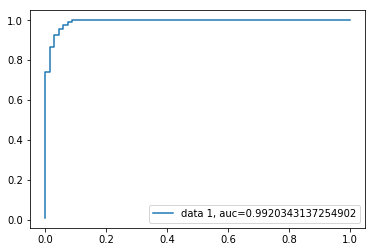

In [91]:
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

#Load Breast Cancer Dataset

breast_cancer = load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

#Split the Dataset

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=44)

#Model

clf = LogisticRegression(penalty='l2', C=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

#Accuracy

print("Accuracy", metrics.accuracy_score(y_test, y_pred))

#AUC Curve

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [103]:
import nltk # needed for Naive-Bayes
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import pandas as pd
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

#Load Breast Cancer Dataset

breast_cancer = load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target

n= 5
kf = KFold(n_splits= n)
sum = 0
for X_train, X_test in kf.split(X):
    train_data = X[X_train]
    test_data = X[X_test]
    y_test= 

   
    y_pred = clf.predict(X_test)
    sum += nltk.classify.accuracy(classifier, test_data)
    fpr, tpr, thresholds = metrics.roc_curve(classifier, test_data, pos_label=2)
    auc_score =  metrics.auc(fpr, tpr)

average = sum/n
auc_score_mean = auc_score/n
average
auc_score_mean

ValueError: too many values to unpack (expected 2)

In [232]:
del sum_l 
del average
del y_pred
del fpr
del tpr
del auc_score
del auc_score_mean
gc.collect()

23116

In [258]:
import sklearn
from sklearn.model_selection import KFold 
import nltk # needed for Naive-Bayes
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
import pandas as pd
from sklearn import svm, datasets
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
#Load Breast Cancer Dataset
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.model_selection import RepeatedStratifiedKFold
breast_cancer = load_breast_cancer()

X = breast_cancer.data
y = breast_cancer.target
sum_l=0
n=5
kf = StratifiedKFold(n_splits=n, random_state=None) 
auc_score=0
auc_score_2=0
for train_index, test_index in kf.split(X,y):
     
       # print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]
      gnb = LogisticRegression() 
      classifier =  gnb.fit(X_train, y_train)
      y_pred = gnb.predict_proba( X_test)[:,1]
      y_class = gnb.predict( X_test)
      sum_l += metrics.accuracy_score( y_class,  y_test)
      fpr, tpr, _ = metrics.roc_curve( y_test, y_pred)
      
      auc_score += metrics.auc(fpr, tpr)
      
    
accuracy_ratio =sum_l /n
auc_score_mean = auc_score/n

auc_score_mean
accuracy_ratio
0.9926590551058287

0.9926590551058287

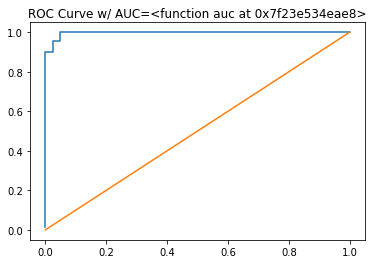

In [245]:
import  matplotlib.pyplot as plt
#df = pd.DataFrame(dict(fpr, tpr))


plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1],'-')
plt.title("ROC Curve w/ AUC=%s" % str(auc))
plt.show()

In [246]:
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
df

,fpr,tpr
0,0.000000,0.014085
1,0.000000,0.901408
2,0.023810,0.901408
3,0.023810,0.957746
4,0.047619,0.957746
5,0.047619,1.000000
6,1.000000,1.000000
